<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [6]</a>'.</span>

In [1]:
# we need to read frames from the movie
# so we install opencv-python - change the next cell type to "Code"

In [2]:
import cv2

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from openpiv import pyprocess, piv

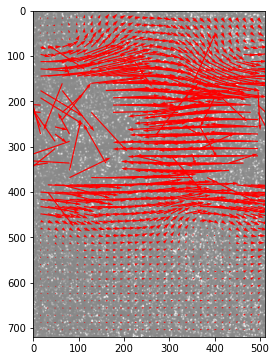

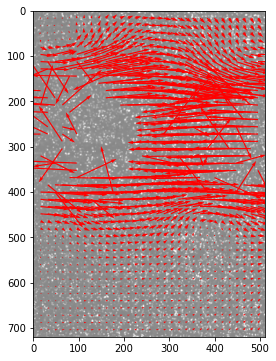

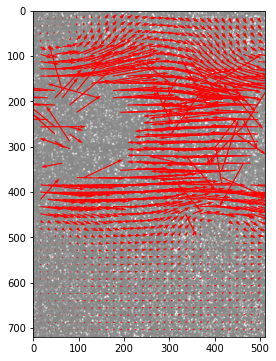

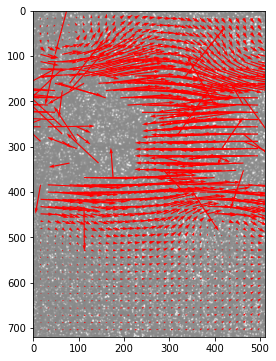

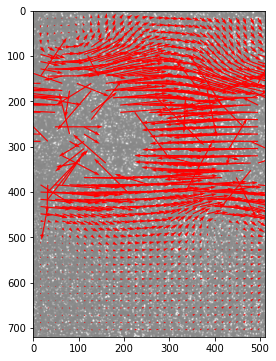

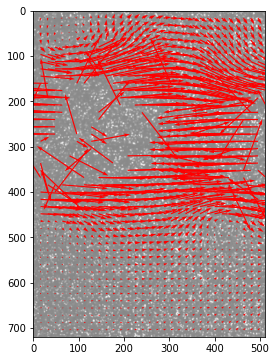

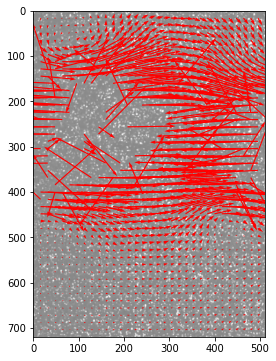

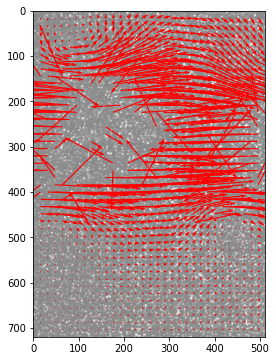

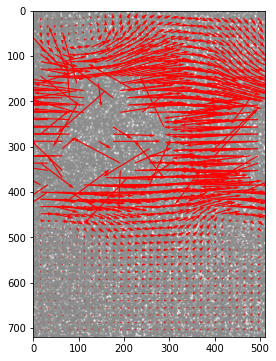

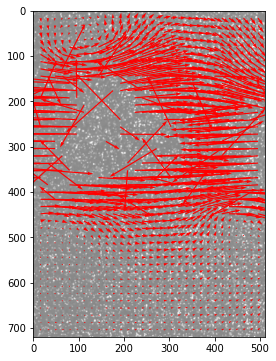

In [5]:
# the video is the jet PIV from Youtube
# https://www.youtube.com/watch?v=EeS1rYMZUxI&ab_channel=USUExperimentalFluidDynamicsLab
# all the rights reserved to the authors

vidcap = cv2.VideoCapture('../test_movie/videoplayback.mp4')
success, image1 = vidcap.read()
count = 0
U = []
V = []

while success and count < 10:
    # cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file      
    success, image2 = vidcap.read()
    # print('Read a new frame: ', success)
    if success:
        x,y,u,v,s2n = piv.simple_piv(image1.sum(axis=2), image2.sum(axis=2),plot=True);
        image1 = image2.copy()
        count += 1
        U.append(u)
        V.append(v)

<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [6]:
U = np.stack(U)
Umean = np.mean(U, axis=0)
V = np.stack(V)
Vmean = np.mean(V,axis=0)

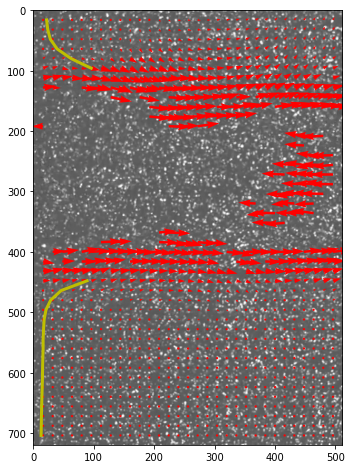

In [7]:
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow(image1,alpha=0.7)
ax.quiver(x,y,Umean,Vmean,scale=200,color='r',width=.008)
# plt.show()
plt.plot(np.mean(Umean,axis=1)*20,y[:,0],color='y',lw=3)